# Handwritten digits classification using neural network

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [5]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt 
%matplotlib inline 
import numpy as np 


In [12]:
(xtrain,ytrain),(xtest,ytest)= keras.datasets.mnist.load_data()


In [13]:
len(xtrain)

60000

In [14]:
len(xtest)

10000

In [15]:
xtrain.shape

(60000, 28, 28)

In [16]:
xtrain = xtrain/255
xtest = xtest/255

In [17]:
xtrain[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

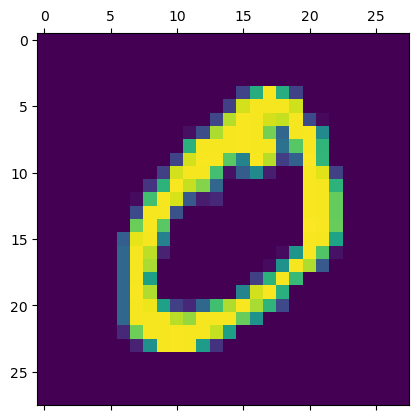

In [18]:
plt.matshow(xtrain[1])

In [19]:
ytrain[1]

0

In [20]:
new_xtrain = xtrain.reshape(len(xtrain),28*28)
new_xtest = xtest.reshape(len(xtest),28*28)

In [21]:
new_xtrain.shape

(60000, 784)

In [22]:
new_xtrain[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [23]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,), activation = 'sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(new_xtrain, ytrain, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 9s 3ms/step - loss: 0.4696 - accuracy: 0.8773
Epoch 2/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3038 - accuracy: 0.9151
Epoch 3/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2828 - accuracy: 0.9211
Epoch 4/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2726 - accuracy: 0.9239
Epoch 5/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2664 - accuracy: 0.9262
Epoch 6/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2619 - accuracy: 0.9270
Epoch 7/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2580 - accuracy: 0.9284
Epoch 8/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2554 - accuracy: 0.9292


In [34]:
model.evaluate(new_xtest,ytest)

313/313 [==============================] - 2s 3ms/step - loss: 0.2648 - accuracy: 0.9271


[0.26477423310279846, 0.9271000027656555]

In [33]:
y_predicated = model.predict(new_xtest)
y_predicated[1]

313/313 [==============================] - 1s 2ms/step


array([1.4972636e-01, 6.5662926e-03, 9.9963927e-01, 1.1832574e-01,
       4.0168244e-11, 8.6122352e-01, 9.1470212e-01, 1.2272095e-14,
       1.2248154e-01, 2.8820569e-11], dtype=float32)

# np.argmax finds a maximum element from an array and returns the index of it

In [34]:
np.argmax(y_predicated[0])

7

In [35]:
len(y_predicated)

10000

In [36]:
y_predicted = [np.argmax(i) for i in y_predicated]

In [37]:
y_predicted[:5]

[7, 2, 1, 0, 4]

In [38]:
cm = tf.math.confusion_matrix(ytest,y_predicted)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 950,    0,    3,    2,    0,    9,    9,    3,    3,    1],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   2,   11,  917,   15,    7,    7,   11,   10,   48,    4],
       [   1,    0,   20,  912,    0,   30,    3,   11,   23,   10],
       [   1,    1,    6,    0,  912,    0,    8,    4,   10,   40],
       [   7,    3,    2,   19,    6,  801,   14,    4,   30,    6],
       [   7,    3,    9,    1,    8,   15,  910,    2,    3,    0],
       [   1,    7,   22,    6,    7,    1,    0,  934,    3,   47],
       [   3,   10,    5,   16,    9,   24,    8,    5,  883,   11],
       [   7,    7,    2,    7,   22,    7,    0,   13,    8,  936]])>

Text(95.72222222222221, 0.5, 'Truth')

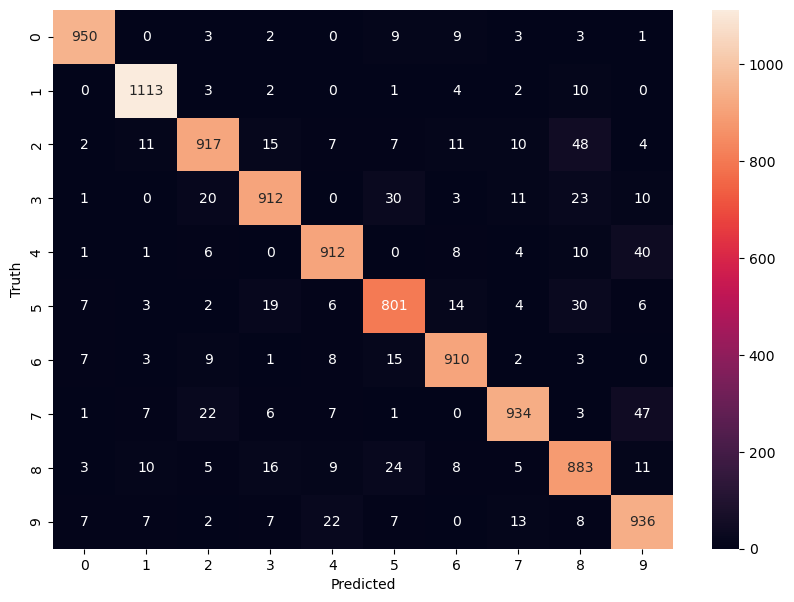

In [39]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using hidden layer



In [40]:
model = keras.Sequential([
    keras.layers.Dense(150,input_shape=(784,), activation = 'relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(new_xtrain, ytrain, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2518 - accuracy: 0.9269
Epoch 2/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1121 - accuracy: 0.9661
Epoch 3/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0756 - accuracy: 0.9773
Epoch 4/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0559 - accuracy: 0.9827
Epoch 5/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0422 - accuracy: 0.9868
Epoch 6/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0337 - accuracy: 0.9889
Epoch 7/8
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0260 - accuracy: 0.9922
Epoch 8/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0223 - accuracy: 0.9924


In [45]:
model.evaluate(new_xtest,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.0864 - accuracy: 0.9754


[0.0864039808511734, 0.9753999710083008]

In [46]:
y_predicted = model.predict(new_xtest)
y_predicted = [np.argmax(i) for i in y_predicted]
y_predicted[:5]


313/313 [==============================] - 1s 2ms/step


[7, 2, 1, 0, 4]

In [47]:
cm = tf.math.confusion_matrix(ytest,y_predicted)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    1,    1,    2,    2,    6,    4,    0,    2,    2],
       [   0, 1127,    2,    2,    0,    1,    1,    0,    2,    0],
       [   2,    2,  998,   12,    2,    0,    4,    2,    9,    1],
       [   0,    0,    3,  989,    0,    9,    0,    2,    2,    5],
       [   1,    2,    2,    2,  945,    0,    3,    2,    1,   24],
       [   2,    0,    0,    4,    2,  875,    4,    0,    2,    3],
       [   2,    3,    1,    1,    4,    6,  937,    0,    4,    0],
       [   1,    5,   11,    2,    1,    0,    1,  993,    6,    8],
       [   1,    0,    2,   11,    2,    3,    0,    3,  949,    3],
       [   0,    2,    0,    2,    6,    6,    1,    4,    7,  981]])>

Text(95.72222222222221, 0.5, 'Truth')

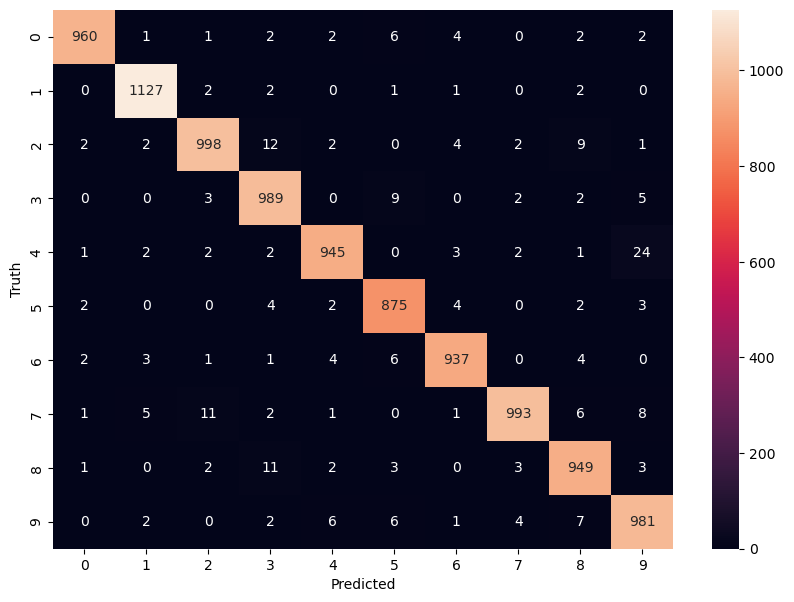

In [48]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')